# Ch 5. Workshop : CNNs - MNIST - Digit Recognition
2020/02/04

> **[ Reference ] :**
+ FRANÇOIS CHOLLET, **Deep Learning with Python**, Chapter 5, Section 1, Manning, 2018. 
  (https://tanthiamhuat.files.wordpress.com/2018/03/deeplearningwithpython.pdf)
+ 李飛飛教授：Convolutional Neural Networks (教學投影片)
  (http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf)
+ 李飛飛教授：Convolutional Neural Networks (CNNs / ConvNets)
  (https://cs231n.github.io/convolutional-networks/)
+ `tf.keras.layers.Conv2D`
  (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
  
----

In [1]:
import tensorflow as tf

tf.__version__

'2.4.1'

### Using Convnet (Convolutional Neural Network, CNN) to classify MNIST digits :

+ **The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers.** 
+ Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
+ In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [2]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Let's display the architecture of our convnet so far:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [6]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the datasets into 4D-Tensor format...
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#### [ About **Loss Function** ]:  `categorical_crossentropy` vs. `sparse_categorical_crossentropy`
> + If the targets are **one-hot encoded**, use **`categorical_crossentropy`**.
        - Examples of one-hot encodings:
                [1,0,0]
                [0,1,0]
                [0,0,1]
+ But if the targets are **integers**, use **`sparse_categorical_crossentropy`**.
        - Examples of integer encodings (for the sake of completion):
                    1
                    2
                    3

In [7]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# validation_split: Float between 0 and 1. 
#                   Fraction of the training data to be used as validation data.

history = model.fit(train_images, 
                    train_labels, 
                    epochs=15, 
                    batch_size=512,
                    validation_split=0.1)

Epoch 1/15
106/106 [==============================] - 5s 18ms/step - loss: 1.2090 - accuracy: 0.6044 - val_loss: 0.1527 - val_accuracy: 0.9555
Epoch 2/15
106/106 [==============================] - 1s 12ms/step - loss: 0.1743 - accuracy: 0.9457 - val_loss: 0.0969 - val_accuracy: 0.9693
Epoch 3/15
106/106 [==============================] - 1s 13ms/step - loss: 0.0933 - accuracy: 0.9699 - val_loss: 0.0637 - val_accuracy: 0.9808
Epoch 4/15
106/106 [==============================] - 1s 13ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0817 - val_accuracy: 0.9768
Epoch 5/15
106/106 [==============================] - 1s 12ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0646 - val_accuracy: 0.9782
Epoch 6/15
106/106 [==============================] - 1s 12ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0441 - val_accuracy: 0.9870
Epoch 7/15
106/106 [==============================] - 1s 12ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0339 - val_accuracy: 0.9907

Let's evaluate the model on the test data:

In [9]:
# verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

In [10]:
test_acc

0.9921000003814697

In [11]:
test_loss

0.027171920984983444

**Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:**

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

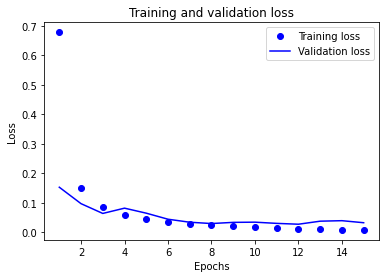

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']          
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

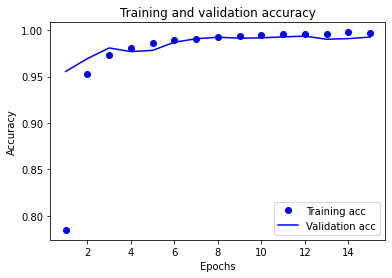

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']          
val_acc_values = history_dict['val_accuracy']  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Prediction

In [15]:
test_predict = model.predict(test_images)
test_predict

array([[7.9132593e-13, 3.3090374e-11, 1.7445494e-10, ..., 1.0000000e+00,
        1.5394713e-10, 1.7254635e-08],
       [1.3188677e-11, 2.6950948e-09, 1.0000000e+00, ..., 5.5632412e-11,
        8.2519609e-11, 5.3065909e-14],
       [4.4537520e-09, 9.9996185e-01, 4.5026454e-06, ..., 1.1004537e-05,
        1.7563514e-05, 2.8338056e-07],
       ...,
       [1.6610883e-15, 1.2394248e-11, 2.6030236e-13, ..., 6.5873457e-12,
        2.4893481e-09, 1.4880008e-09],
       [9.2007730e-12, 1.9117177e-12, 6.7162733e-15, ..., 1.2800091e-13,
        5.2367568e-08, 1.9034496e-10],
       [2.1641036e-09, 6.8054663e-12, 3.4046259e-09, ..., 3.4456598e-12,
        2.7393645e-09, 1.1198589e-12]], dtype=float32)

In [16]:
import numpy as np
test_predict_result = np.array([np.argmax(test_predict[i]) for i in range(len(test_predict))])
test_predict_result

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Confusion Matrix

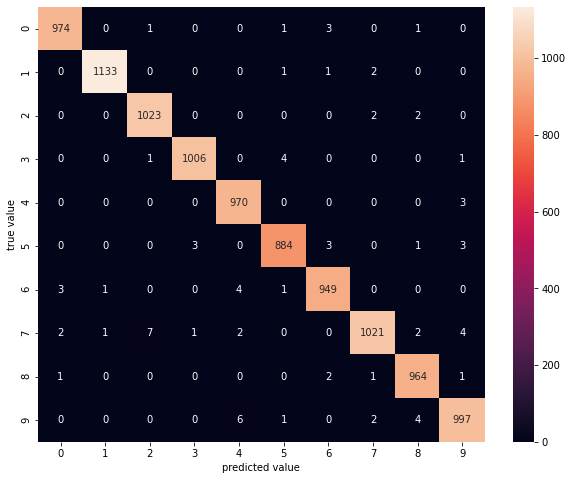

array([[ 974,    0,    1,    0,    0,    1,    3,    0,    1,    0],
       [   0, 1133,    0,    0,    0,    1,    1,    2,    0,    0],
       [   0,    0, 1023,    0,    0,    0,    0,    2,    2,    0],
       [   0,    0,    1, 1006,    0,    4,    0,    0,    0,    1],
       [   0,    0,    0,    0,  970,    0,    0,    0,    0,    3],
       [   0,    0,    0,    3,    0,  884,    3,    0,    1,    3],
       [   3,    1,    0,    0,    4,    1,  949,    0,    0,    0],
       [   2,    1,    7,    1,    2,    0,    0, 1021,    2,    4],
       [   1,    0,    0,    0,    0,    0,    2,    1,  964,    1],
       [   0,    0,    0,    0,    6,    1,    0,    2,    4,  997]])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_predict_result, test_labels)

plt.figure(figsize=(10,8))
sns.heatmap(mat, square=False, annot=True, fmt ='d', cbar=True)
plt.xlim((0, 10))
plt.ylim((10, 0))
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

mat